<h1><center>«Portfolio-Exam Part II» </center></h1>
<h2><center>MADS-ML </center></h2>
<h3><center>Author: Tom Wüsten </center></h3>

### Abstract
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
	 <br>



### Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
#### related with the last contact of the current campaign: 
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). <br>
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. <br>
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <br>
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) <br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
20 - nr.employed: number of employees - quarterly indicator (numeric) <br>

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>


### Outline
* [Data Cleansing](#1) <br>
* [Data Exploration](#2) <br>
* [Data Preparation](#3) <br>
* [Classification](#4) <br>
	* [Decision Tree](#5) <br>
	* [Random Forest](#6) <br>
	* [balanced Random Forest](#7) <br>
	* [Support Vector Machines](#8) <br>
* [Interpretation](#9) <br>

In [222]:
#Load Libaries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, tree
from imblearn.over_sampling import RandomOverSampler 
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score
import sklearn.metrics as ms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, tree
import seaborn as sns
import math
from sklearn.svm import SVC 
from sklearn.decomposition import PCA

### Data Cleansing <a id='1'></a> 
In Data Cleansing the data is checked for duplicates and missing values.

In [513]:
# Load Data
df = pd.read_csv("bank-additional.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


The first step in Data Cleaning is checking if the data set contains duplicated rows. No duplicates can be found.

In [4]:
duplicated_rows = df[df.duplicated() == True]
print("The dataset contains "+ str(duplicated_rows.shape[0]) + " fully duplicatated rows.")
print(df.shape)
df = df.drop_duplicates()
df.shape

The dataset contains 0 fully duplicatated rows.
(4119, 21)


(4119, 21)

The next step in data cleaning is to analyse whether there is missing data in the columns. The result of the analysis is that the dataset has no missing data.

In [5]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

The data set contains 21 features. The features are numerical (10) and categorical (11). Every row represents a customer which was called by an agent from the bank. The data set contains 4119 persons.

In [490]:
df.shape

(4119, 20)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.astype('object').describe()

From the information on the dataset, we learned that the feature pdays describes the number of days the customer was contacted after the campaign. The owner of the dataset also mentioned that the value represents 999 customers who were not contacted after the marketing campaign.

In [ ]:
df[df["pdays"] == 999].shape[0]
print("After the marketing campaign "+ str(df[df["pdays"] == 999].shape[0]) + " clients were not contacted. That are " + str(round(df[df["pdays"] == 999].shape[0]/df.shape[0]*100,2)) + " % of the clients.")

In [ ]:
numerical_features =df.select_dtypes(["int64", 'float64'])
numerical_features

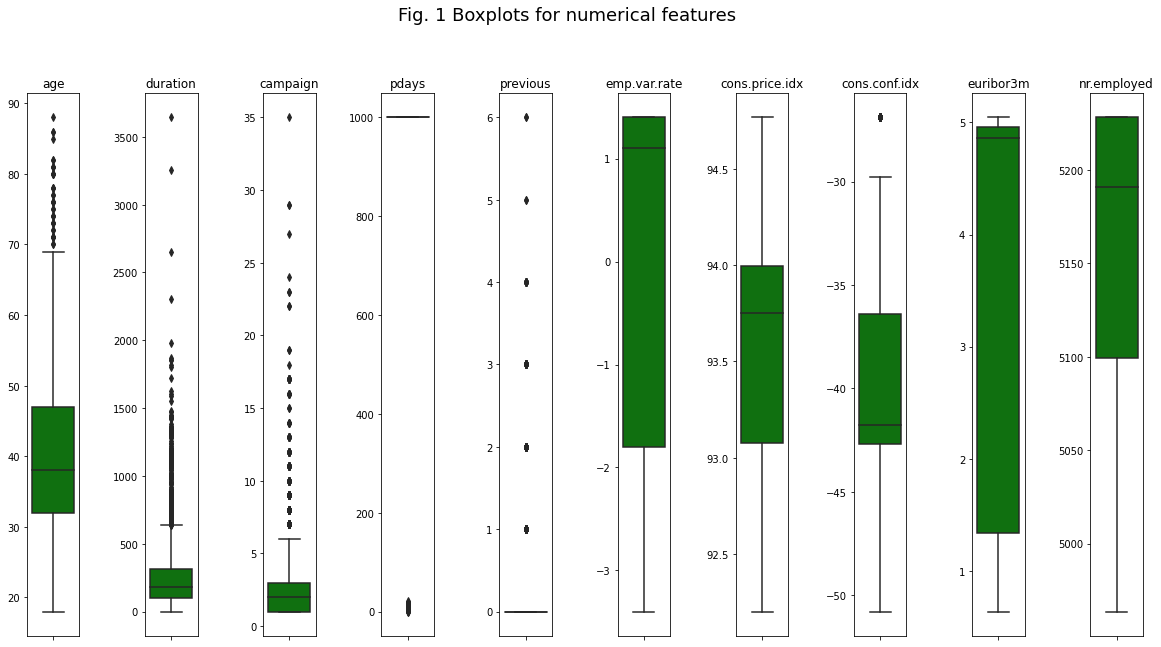

In [512]:

inputs = list(numerical_features.columns) #convert the column names to a list
# Determine the number of logging curves
num_inputs = len(inputs)
# Create a figure with 1 row, and num_inputs long
fig, axs = plt.subplots(1, num_inputs, figsize=(20,10))
fig.suptitle('Fig. 1 Boxplots for numerical features' , 
             horizontalalignment = 'center', y= fig.subplotpars.right+0.1, fontsize=18)
# Use a for loop to loop over each column in the dataframe and 
# create a separate box plot
for i, (ax, curve) in enumerate(zip(axs.flat, inputs)):
    sns.boxplot(y=numerical_features[curve], ax=ax, color='green', showmeans=False)
    ax.set_title(inputs[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.15, wspace=1.25)
plt.show()

In [ ]:
categorical_features =df.select_dtypes(["object"])
categorical_features

The feature y shows whether a contract has been concluded after a conversation with the bank employee. A successful contract was concluded for 11.27% and the remaining 88.73% did not conclude a contract. The distribution of the data shows that only a small number of customers concluded the contract. For the later creation of the machine learning model, we must ensure that the same distribution of training examples and test data is maintained. The methods of implementation are shown in the Data Preparation chapter.


In [14]:
distribution = df["y"].value_counts()
print("The dataset contains:"+ str(df.shape[0]) + " samples of phone calls with customers. The subcription of term negative is "+ str(round(distribution[0]/df.shape[0]*100,2)) + "% and the subcription of term positive is "+ str(round(distribution[1]/df.shape[0]*100,2)) + "%.")
print(distribution)

The dataset contains:4119 samples of phone calls with customers. The subcription of term negative is 89.05% and the subcription of term positive is 10.95%.
no     3668
yes     451
Name: y, dtype: int64


### Data Exploration <a id='2'></a> 

## Relationship between age and subscribing of contracts
For data analysis, the feature age in relation to contract conclusion is to be examined.  In order to present the data in a more meaningful way, I have sorted the data into age groups. Since there is not as much data for customers over 60 years of age, these customers were sorted into one group. <br>
In Figure 1, the first subplot examines the age structure and the second subplot the age groups with regard to the conclusion of a contract. It can be seen that the majority of customers are in the age group 30-39 , followed by the age group 40-49 and 50-59. The smallest number of customers are in the age group 60+ and 18-19. <br>
The second subplot shows that the rate of contract conclusion is approximately the same for almost all age groups. The exception is the 60+ age group, which clearly stands out with a contract conclusion rate of over 35%. This high rate may also be due to the fact that the number of customers is significantly lower than in the other age groups.

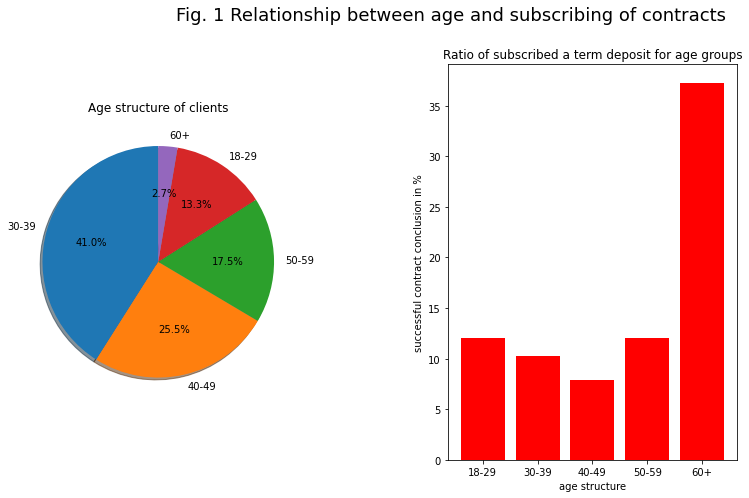

In [511]:
relation_age = pd.DataFrame(df[["age", "y"]])
bins = [18, 29, 39, 49, 59,120]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
relation_age['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = False)
relation_age = relation_age.groupby("agerange", as_index=False).agg(Age_percentage = ("agerange", "count")).sort_values(by = "Age_percentage", ascending= False)
# Figure Size
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=1.8, top=1.5, wspace=0.5, hspace=None)
fig.suptitle('Fig. 1 Relationship between age and subscribing of contracts' , 
             horizontalalignment = 'left', y= fig.subplotpars.right-00.1, fontsize=18)
ax[0].pie(relation_age["Age_percentage"], labels= relation_age["agerange"], autopct='%1.1f%%',  pctdistance=0.6,
        shadow=True, startangle=90)
ax[0].set_title('Age structure of clients')
# second
relation_age = pd.DataFrame(df[["age", "y"]])
relation_age['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = False)
relation_age = relation_age.groupby(["agerange", "y"], as_index=False).agg(Age_count_y = ("agerange", "count")).sort_values(by = ["agerange","y"], ascending= True)
relation_age = pd.get_dummies(relation_age, columns=["y"])
relation_age["subcribed_counts"] = relation_age["Age_count_y"].shift(-1)
relation_age = relation_age[:-1]
relation_age=relation_age.iloc[::2]
relation_age["subscribe_positive_in_percantage"] = relation_age.apply(lambda x: x["subcribed_counts"]/(x["Age_count_y"]+x["subcribed_counts"])*100, axis=1)
ax[1].bar(relation_age["agerange"], relation_age["subscribe_positive_in_percantage"], color='r')
# Bar Plot
ax[1].set_ylabel('successful contract conclusion in %')
ax[1].set_xlabel('age structure')
ax[1].set_title('Ratio of subscribed a term deposit for age groups')
# Show Plot
plt.show()

## Relationship between job and subscribing of contracts
The next analysis will look at the relationship of jobs in relation to contract completions. <br>
Figure 2 shows in the two subplots the different jobs of the customers and the conclusion of contracts in relation to the job. From the first subplot, it can be seen that the bank divides the clients into 12 job categories. The categories do not necessarily have to represent an occupation - see retired, unknown or student. Furthermore, it is clear that the majority of customers are admin, blue-collar or technician. <br>
In the second subplot, it becomes clear that the job categories student and retired stand out in terms of contract conclusions. This may be due to the fact that very little data exists on these types. However, it is also evident that the job types admin and technician also have high completion rates and there is lot of data is available on these job types.

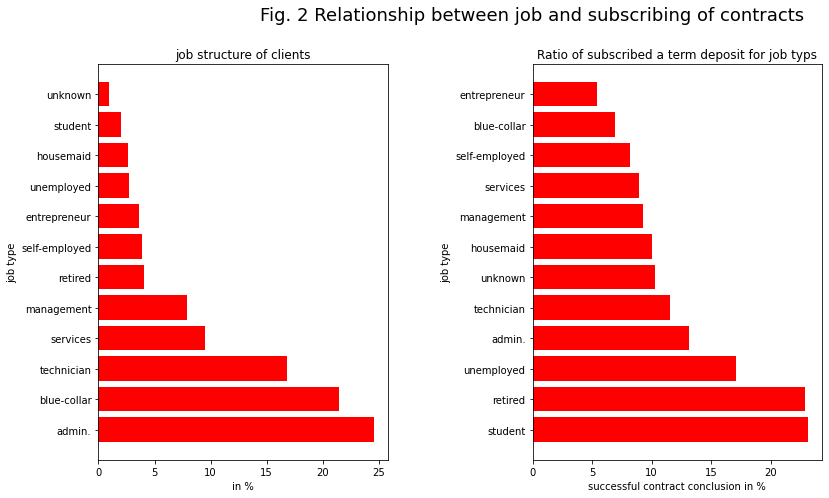

In [508]:
relation_job = pd.DataFrame()
relation_job = df.groupby("job", as_index=False).agg(Job_count = ("default", "count")).sort_values(by = "Job_count", ascending= False)
relation_job["Percentage"] = 100*relation_job["Job_count"]/df.shape[0]
# Figure Size
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=1.8, top=1.5, wspace=0.5, hspace=None)
fig.suptitle('Fig. 2 Relationship between job and subscribing of contracts' , 
             horizontalalignment = 'left', y= fig.subplotpars.right-00.1, fontsize=18)
# Horizontal Bar Plot
ax[0].barh(relation_job["job"], relation_job["Percentage"], color='r')
ax[0].set_ylabel('job type')
ax[0].set_xlabel('in %')
ax[0].set_title('job structure of clients')
# second
relation_job = pd.DataFrame()
relation_job = df.groupby(["job", "y"], as_index=False).agg(job_count_y = ("job", "count")).sort_values(by = ["job","y"], ascending= True)
relation_job = pd.get_dummies(relation_job, columns=["y"])
relation_job["subcribed_counts"] = relation_job["job_count_y"].shift(-1)
relation_job = relation_job[:-1]
relation_job=relation_job.iloc[::2]
relation_job["subscribe_positive_in_percantage"] = relation_job.apply(lambda x: x["subcribed_counts"]/(x["job_count_y"]+x["subcribed_counts"])*100, axis=1)
relation_job = relation_job.sort_values(by= "subscribe_positive_in_percantage", ascending=False)
ax[1].barh(relation_job["job"], relation_job["subscribe_positive_in_percantage"], color='r')
# Horizontal Bar Plot
ax[1].set_ylabel('job type')
ax[1].set_xlabel('successful contract conclusion in %')
ax[1].set_title('Ratio of subscribed a term deposit for job typs')
# Show Plot
plt.show()

## Relationship between marketing campaigns and subscribing of contracts
As a final analysis, I would like to look at the number of calls in the marketing campaigns versus the number of contracts signed.  <br>
In Figure 3, the number of calls per marketing campaign is related to the number of contracts signed. In the first subplot, the number of calls in the marketing campaign is examined. This shows that most of the bank's customers are called 1-3 times in a marketing campaign. However, a few customers were also contacted significantly more often. These are summarised under Miscellaneous.  <br>
The second plot contrasts the number of calls with the number of contracts signed. In general, a similar completion rate can be observed for the number of calls 1-4. In addition, a drop in completion rates can then be seen up to call number 11. For higher numbers of calls, a very high success rate of contracts can be seen. These results can be seen as exceptions, as there is very little data for these call numbers. As a conclusion, it can be seen that the success rate of 12% of contract conclusions is applicable for 88% of the customers.

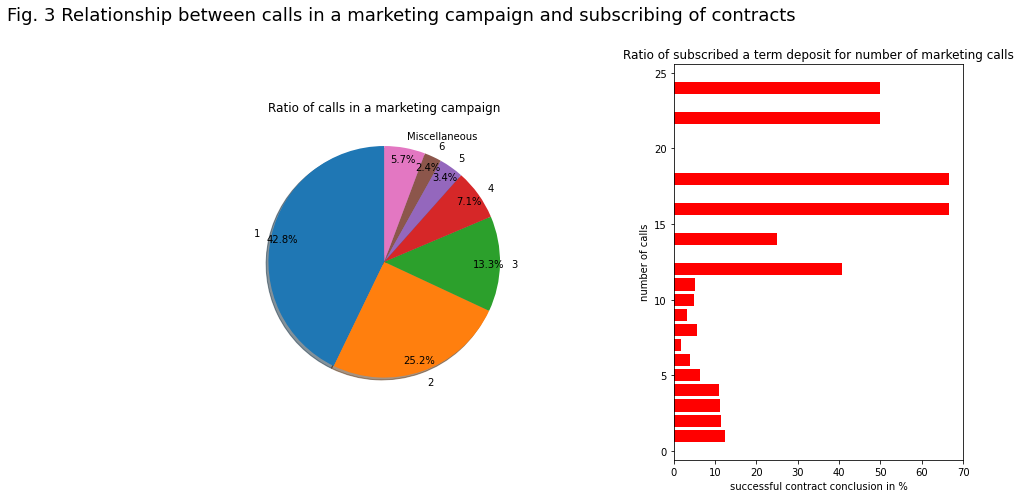

In [510]:
relation_campaign = pd.DataFrame()
relation_campaign = df.groupby("campaign", as_index=False).agg(campaign_count = ("default", "count")).sort_values(by = "campaign_count", ascending= False)
relation_campaign["Percentage"] = 100*relation_campaign["campaign_count"]/df.shape[0]
percentage = relation_campaign[relation_campaign.Percentage < 2].sum()
mask = relation_campaign.Percentage > 2
relation_campaign = relation_campaign[mask]
relation_campaign = relation_campaign.append(pd.DataFrame({'campaign': ["Miscellaneous"], 'Percentage': [percentage["Percentage"]]}))
# Figure Size
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=1.8, top=1.5, wspace=0.5, hspace=None)
fig.suptitle('Fig. 3 Relationship between calls in a marketing campaign and subscribing of contracts' , 
             horizontalalignment = 'center', y= fig.subplotpars.right-00.1, fontsize=18)
# Horizontal Bar Plot
ax[0].pie(relation_campaign["Percentage"],  labels= relation_campaign["campaign"], autopct='%1.1f%%',  pctdistance=0.9,
        shadow=True, startangle=90)
ax[0].set_title('Ratio of calls in a marketing campaign')
# second
relation_campaign = df[df["campaign"] <=30]
relation_campaign = relation_campaign.groupby(["campaign", "y"], as_index=False).agg(campaign_count_y = ("campaign", "count")).sort_values(by = ["campaign","y"], ascending= True)
relation_campaign = pd.get_dummies(relation_campaign, columns=["y"])
relation_campaign["subcribed_counts"] = relation_campaign["campaign_count_y"].shift(-1)
relation_campaign = relation_campaign[:-1]
relation_campaign=relation_campaign.iloc[::2]
relation_campaign["subscribe_positive_in_percantage"] = relation_campaign.apply(lambda x: x["subcribed_counts"]/(x["campaign_count_y"]+x["subcribed_counts"])*100, axis=1)
relation_campaign = relation_campaign.sort_values(by= "subscribe_positive_in_percantage", ascending=False)
ax[1].barh(relation_campaign["campaign"], relation_campaign["subscribe_positive_in_percantage"], color='r')
# Horizontal Bar Plot
ax[1].set_ylabel('number of calls')
ax[1].set_xlabel('successful contract conclusion in %')
ax[1].set_title('Ratio of subscribed a term deposit for number of marketing calls')
# Show Plot
plt.show()

### Data Preparation <a id='3'></a> 

The owner of the dataset provides the information that the feature duration has high impact of the prediction and is not known before the call. Therefore this feature will not be used in ML modells. In order to use the ML models Decision Tree and Random Forest for the later classification, all features must be available in numerical format. For the conversion of the features I use One-Hot Encoding. In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category. The only exception is the feature y, as this is my target variable.  For this feature I don't want an additional column, so I use the label encoding. Each value is converted into an integer value. Here, True is converted to 1 and False to 0.  

In [514]:
# Drop feature Duration
df = df.drop("duration", 1)

C:\Users\wuest\AppData\Local\Temp/ipykernel_12320/2800050893.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("duration", 1)


In [515]:
# Encode feature y in numeric feature 
lb_make = LabelEncoder()
df['y']= lb_make.fit_transform(df['y'])

Machine Learning Setup:
split target in y <br>
convert  x <br>
splitting dataset in train and test data <br>
30% test data and 70% traning data <br>
use stratify because of imbalaced dataset <br>
use the standardscaler to scale X_train and X_test to have similar averages and standard distribution

In [516]:
def ml_setup_dummy_encoding(df):
    # set traget variable
    y = df["y"]
    # Delete target feature from dataframe
    df1= df.iloc[: , :-1]
    # Encoode categorical feature via dummy encoding into numeric feature
    X = pd.get_dummies(df1, columns=['job', 'marital', 'education','default','housing', 'loan','contact','month','day_of_week','poutcome'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify= y, shuffle=True)
    scaler1 = preprocessing.StandardScaler().fit(X_train)
    X_train_sc = scaler1.transform(X_train)
    X_test_sc = scaler1.transform(X_test)
    return X_train_sc, y_train, X_test_sc, y_test

In [18]:
def ml_setup_one_hot_encoding(df):
    # set traget variable
    y1 = df["y"]
    # Delete target feature from dataframe
    df2= df.iloc[: , :-1]
    # Encoode categorical feature via one-hot-encoding  into numeric feature
    X1 = OneHotEncoder(drop='first').fit_transform(df2['job', 'marital', 'education','default','housing', 'loan','contact','month','day_of_week','poutcome'])
    #X = pd.get_dummies(df, columns=['job', 'marital', 'education','default','housing', 'loan','contact','month','day_of_week','poutcome'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify= y, shuffle=True)
    scaler1 = preprocessing.StandardScaler().fit(X_train)
    X_train_sc = scaler1.transform(X_train)
    X_test_sc = scaler1.transform(X_test)
    return X_train_sc, y_train, X_test_sc, y_test
    

### Classification <a id='4'></a> 
In the chapter Classification, different methods are compared on the basis of metrics. Each experiment follows the same structure. The first step is hyperparameter optimisation using cross validation. The optimal hyperparameters are then used to train the machine learning models. The last step of the experiment is to test the machine learning model using test data. The result obtained is then presented in a confusion matrix, which shows how good the prediction of the model was. In order to compare the different machine learning models, the results are stored in an evaluation dataframe. The evaluation of the models takes place in the chapter Evaluation. <br>
In addition, all the necessary functions for the machine learning models are created in this chapter. This should lead to better clarity in the experiments. <br>
In the following, the machine learning models Decision Tree, Random Forest and Support Vector Machines are used for classification with the aim of predicting whether the customer will conclude a contract with the bank.

\begin{equation*}
P(E)   = {n \choose k} p^k (1-p)^{ n-k}
\end{equation*}

%%latex
\begin{tabular}{c >{\bfseries}r @{\hspace{0.7em}}c @{\hspace{0.4em}}c @{\hspace{0.7em}}l}
  \multirow{10}{*}{\rotatebox{90}{\parbox{1.1cm}{\bfseries\centering actual\\ value}}} & 
    & \multicolumn{2}{c}{\bfseries Prediction outcome} & \\
  & & \bfseries p & \bfseries n & \bfseries total \\
  & p$'$ & \MyBox{True}{Positive} & \MyBox{False}{Negative} & P$'$ \\[2.4em]
  & n$'$ & \MyBox{False}{Positive} & \MyBox{True}{Negative} & N$'$ \\
  & total & P & N &
\end{tabular}

\begin{equation*}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation*}
\begin{equation*}
Precision = \frac{TP}{TP+FP}
\end{equation*}
\begin{equation*}
Recall = \frac{TP}{TP+FP}
\end{equation*}
\begin{equation*}
F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}
\end{equation*}

In [19]:
def cross_validate_setting(X,y,model, params):
    """ Form a cross validate setting.
     
    Keywords arguments:
    X       -- input data as dataframe
    y       -- target as dataframe
    model   -- classifier as estimator object
    params  -- hyperparameter as dict
    """    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    clf = GridSearchCV(model, params, scoring='balanced_accuracy', cv=cv, n_jobs = -1)
    search = clf.fit(X,y)
    return search

In [194]:
evaluation_df = pd.DataFrame({'algorithm':[], 'F1_score':[],'balanced accuracy':[], 'confusion matrix':[],'best hyperparameters':[]})

In [21]:
def calc_f1_score(model,x_train,y_train,x_test,y_test):
    """calculate the accuracy of a model
    
    Keywords arguments:
    x_train -- train data as dataframe
    y_train -- train target as dataframe
    x_test  -- test data as dataframe
    y_test  -- test target as dataframe
    model   -- classifier as estimator object
    
    """
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    print(f1_score(y_test, y_test_pred))
    return f1_score(y_test, y_test_pred)

In [22]:
def calc_balanced_accuracy_score(model,x_train,y_train,x_test,y_test):
    """calculate the balanced accuracy of a model
    
    Keywords arguments:
    x_train -- train data as dataframe
    y_train -- train target as dataframe
    x_test  -- test data as dataframe
    y_test  -- test target as dataframe
    model   -- classifier as estimator object
    
    """
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    print(balanced_accuracy_score(y_test, y_test_pred))
    return balanced_accuracy_score(y_test, y_test_pred)

In [62]:
def plot_confusio_matrix(cm,plot_nr):
    """create a seaborn heatmap to show the confusion matrix
    
    Keywords arguments:
    cm -- confusion matrix
    plot_nr -- Number of plot
    
    """
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g',cmap = "bwr" ,ax=ax, linewidths=1);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title("Confusion Matrix "+ str(plot_nr)); 
    ax.xaxis.set_ticklabels(['subscribed no', 'subscribed yes']);
    ax.yaxis.set_ticklabels(['subscribed no', 'subscribed yes']);

In [220]:
def plot_all_confusion_matrix(evaluation):
    """create a seaborn heatmap of all models to show the confusion matrix
    
    Keywords arguments:
    evaluation dataframe which has all cofusion matrix of al models included
    """

    fig, ax = plt.subplots(1,5)
    plt.subplots_adjust(left=None, bottom=None, right=2.5, top=0.5, wspace=0.5, hspace=None)
    for i in range(0,evaluation.shape[0]):
        sns.heatmap(evaluation.iloc[i,3].astype('int'), annot=True, fmt='g',cmap = "bwr" ,ax=ax[i], linewidths=1)
        ax[i].set_xlabel('Predicted labels')
        ax[i].set_ylabel('True labels')
        ax[i].set_title(f'Confusion Matrix  {evaluation.iloc[i,0]}')
    plt.show()

    

#### Decision Tree <a id='5'></a> 

In [195]:
clf = tree.DecisionTreeClassifier(criterion='gini')
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
max_depth_range = list(range(2,15))
hyperparameter = {"max_depth": max_depth_range}
score = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score.best_params_)
print(score.best_score_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['Decision tree'], 'best hyperparameters':[score.best_params_]}),ignore_index=True)


{'max_depth': 12}
0.6150026966706414


In [196]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=11)
evaluation_df.iloc[0,1] = calc_f1_score(model,X_train_sc, y_train, X_test_sc, y_test)
model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
evaluation_df.iloc[0,2] = calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.3287671232876712
0.5816227671813503


In [197]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=11)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
np.array(confusion_matrix(y_test, y_test_pred),dtype=int)

array([[1053,   48],
       [  99,   36]])

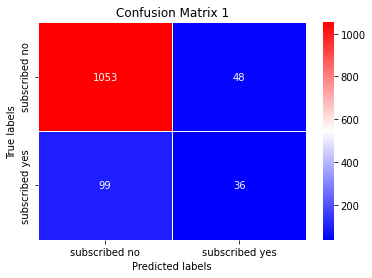

In [198]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=11)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
evaluation_df.iloc[0,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]
cm = confusion_matrix(y_test, y_test_pred)
plot_confusio_matrix(cm,1)

In [609]:
def check_overfitting(X_train_sc, y_train,X_test_sc, y_test):
    train_scores = list()
    test_scores = list()
    # define the tree depths to evaluate
    values = [i for i in range(1, 21)]
    # evaluate a decision tree for each depth
    for i in values:
        # configure the model
        model =  tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=i)
        # fit model on the training dataset
        model.fit(X_train_sc, y_train)
        # evaluate on the train dataset
        train_yhat = model.predict(X_train_sc)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)
        # evaluate on the test dataset
        test_yhat = model.predict(X_test_sc)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)
        # summarize progress
    # plot of train and test scores vs tree depth
    print(values )
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.legend()
    plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


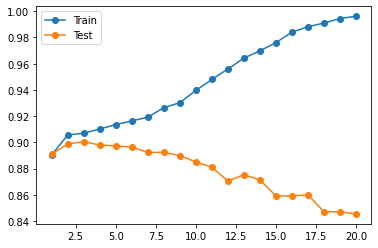

In [610]:
check_overfitting(X_train_sc, y_train,X_test_sc, y_test)

#### Random Forest <a id='6'></a> 

In [653]:
clf = RandomForestClassifier()
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_random_forest = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score_random_forest.best_params_)
print(score_random_forest.best_score_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['RandomForest'], 'best hyperparameters':[score_random_forest.best_params_]}),ignore_index=True)


{'max_depth': 10, 'n_estimators': 1}
0.6043708079029121


In [711]:
def check_overfitting(type, X_train_sc, y_train,X_test_sc, y_test, hyperparameter, kernel, figure_nr):
    train_scores = list()
    test_scores = list()
    # define the tree depths to evaluate
    # evaluate a decision tree for each depth
    allNames = sorted(hyperparameter)
    combinations = it.product(*(hyperparameter[Name] for Name in allNames))
    result = list(combinations)
    evaluation_df_overfit = pd.DataFrame()
    if type == "tree":
        for index, tuple in enumerate(result):
            # configure the model
            model =  RandomForestClassifier()(criterion='gini', random_state=1, max_depth=tuple[0], )
            # fit model on the training dataset
            model.fit(X_train_sc, y_train)
            # evaluate on the train dataset
            train_yhat = model.predict(X_train_sc)
            train_acc = balanced_accuracy_score(y_train, train_yhat)
            train_scores.append(train_acc)
            # evaluate on the test dataset
            test_yhat = model.predict(X_test_sc)
            test_acc = balanced_accuracy_score(y_test, test_yhat)
            test_scores.append(test_acc)
            evaluation_df_overfit = evaluation_df_overfit.append(pd.DataFrame({'algorithm':['Decision Tree'], 'max_deph':[tuple[0]], 'test_acc':[test_acc], 'train_acc':[train_acc]}),ignore_index=True)
            # summarize progress
        # plot of train and test scores vs tree depth
        plt.plot(result, train_scores, '-o', label='Train')
        plt.plot(result, test_scores, '-o', label='Test')
        plt.xlabel(list(hyperparameter.keys())[0])
        plt.legend()
        plt.show()
    elif type =="rdf":
        value1 = len(hyperparameter[list(hyperparameter)[-1]])
        value2 = len(hyperparameter[list(hyperparameter)[0]])
        fig, ax = plt.subplots(1,value2)
        ax = ax.flatten()
        plt.subplots_adjust(left=None, bottom=None, right=1.8, top=1.5, wspace=0.5, hspace=None)
        fig.suptitle(f'Fig. {figure_nr} Comparison Random Forest of balenced accuracy for train and test set ' , 
        horizontalalignment = 'center', y= fig.subplotpars.right-00.1, fontsize=18)
        counter = 0
        for i, ax in zip(hyperparameter[list(hyperparameter)[0]], ax.flatten()):
            counter = counter +1
            train_scores = list()
            test_scores = list()
            for j in hyperparameter[list(hyperparameter)[-1]]:
                # configure the model
                counter = counter +1
                model =  RandomForestClassifier(criterion='gini', random_state=1, max_depth=i, n_estimators = j)
                # fit model on the training dataset
                model.fit(X_train_sc, y_train)
                # evaluate on the train dataset
                train_yhat = model.predict(X_train_sc)
                train_acc = balanced_accuracy_score(y_train, train_yhat)
                train_scores.append(train_acc)
                # evaluate on the test dataset
                test_yhat = model.predict(X_test_sc)
                test_acc = balanced_accuracy_score(y_test, test_yhat)
                test_scores.append(test_acc)
                evaluation_df_overfit = evaluation_df_overfit.append(pd.DataFrame({'algorithm':['Random Forest'], 'max_deph':[i],'n_estimators': [j], 'test_acc':[test_acc], 'train_acc':[train_acc]}),ignore_index=True)
            # plot of train and test scores vs tree depth
            #print(len(hyperparameter[list(hyperparameter)[-1]]))
            ax.plot(hyperparameter[list(hyperparameter)[-1]], train_scores, '-o', label='Train')
            ax.plot(hyperparameter[list(hyperparameter)[-1]], test_scores, '-o', label='Test')
            ax.set_title(f'RDF max_deph {i}')
            ax.set_ylabel("Balanced Accuracy Score")
            ax.set_xlabel(list(hyperparameter.keys())[-1])
            ax.legend()
    elif type == "svm":
        value1 = len(hyperparameter[list(hyperparameter)[1]])
        value2 = len(hyperparameter[list(hyperparameter)[0]])
        fig, ax = plt.subplots(1,value2)
        ax = ax.flatten()
        plt.subplots_adjust(left=None, bottom=None, right=1.8, top=1.5, wspace=0.5, hspace=None)
        fig.suptitle(f'Fig. {figure_nr} Comparison SVM kernel: {kernel} of balenced accuracy for train and test set ' , 
        horizontalalignment = 'center', y= fig.subplotpars.right-00.1, fontsize=18)
        for i, ax in zip(hyperparameter[list(hyperparameter)[0]], ax.flatten()):
            train_scores = list()
            test_scores = list()           
            for j in hyperparameter[list(hyperparameter)[-1]]:
                # configure the model
                model =  SVC(kernel = kernel, gamma = i, C = j)
                # fit model on the training dataset
                model.fit(X_train_sc, y_train)
                # evaluate on the train dataset
                train_yhat = model.predict(X_train_sc)
                train_acc = balanced_accuracy_score(y_train, train_yhat)
                train_scores.append(train_acc)
                # evaluate on the test dataset
                test_yhat = model.predict(X_test_sc)
                test_acc = balanced_accuracy_score(y_test, test_yhat)
                test_scores.append(test_acc)
                evaluation_df_overfit = evaluation_df_overfit.append(pd.DataFrame({'algorithm':['SVM Kernel: '+ kernel], 'C':[i],'gamma': [j], 'test_acc':[test_acc], 'train_acc':[train_acc]}),ignore_index=True)
            # plot of train and test scores vs tree depth
            #print(len(hyperparameter[list(hyperparameter)[-1]]))
            ax.plot(hyperparameter[list(hyperparameter)[-1]], train_scores, '-o', label='Train')
            ax.plot(hyperparameter[list(hyperparameter)[-1]], test_scores, '-o', label='Test')
            ax.set_title(f'SVM C={i} ')
            ax.set_ylabel("Balanced Accuracy Score")
            ax.set_xlabel(list(hyperparameter.keys())[-1])
            ax.legend()
    return evaluation_df_overfit

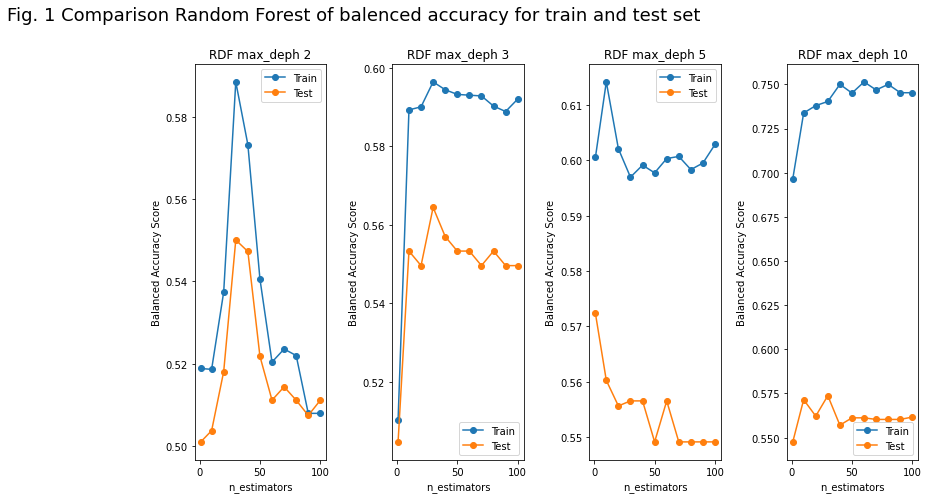

In [684]:
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,20,30,40,50,60,70,80,90,100]}
result = check_overfitting("rdf",X_train_sc, y_train,X_test_sc, y_test, hyperparameter, "", 1)

In [689]:
result.sort_values(by= ["test_acc","train_acc"], ascending=False).head(5)

,algorithm,max_deph,n_estimators,test_acc,train_acc
36,Decision Tree,10,30,0.573761,0.740312
22,Decision Tree,5,1,0.572328,0.600559
34,Decision Tree,10,10,0.571491,0.733788
14,Decision Tree,3,30,0.564396,0.596372
35,Decision Tree,10,20,0.562196,0.737950


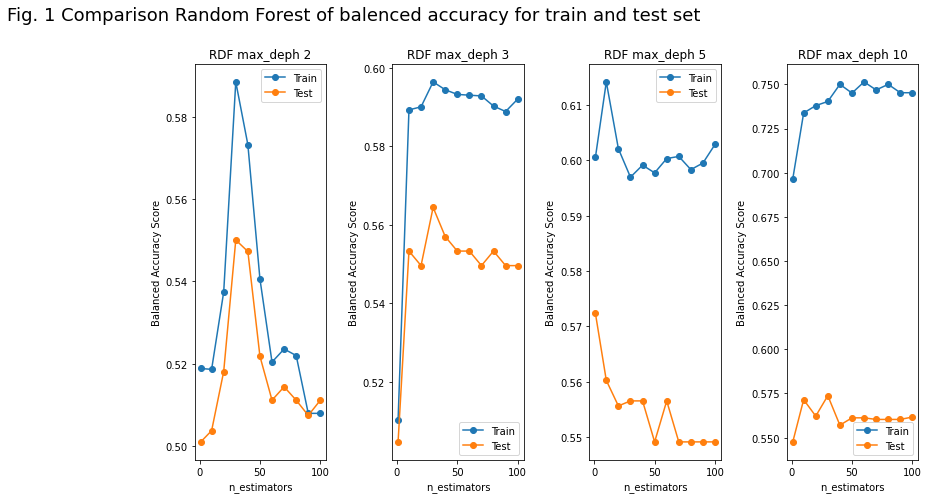

In [719]:
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,20,30,40,50,60,70,80,90,100]}
result_tree= check_overfitting("rdf",X_train_sc, y_train,X_test_sc, y_test, hyperparameter, '',1)

In [720]:
result_tree.sort_values(by = ["test_acc", "train_acc"], ascending = False).head(5)

,algorithm,max_deph,n_estimators,test_acc,train_acc
36,Random Forest,10,30,0.573761,0.740312
22,Random Forest,5,1,0.572328,0.600559
34,Random Forest,10,10,0.571491,0.733788
14,Random Forest,3,30,0.564396,0.596372
35,Random Forest,10,20,0.562196,0.737950


In [721]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=5,n_estimators=1)
evaluation_df.iloc[1,1] = calc_f1_score(model,X_train_sc, y_train, X_test_sc, y_test)
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=5,n_estimators=1)
evaluation_df.iloc[1,2] = calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.25
0.5723281864971238


[[1059   42]
 [ 117   18]]


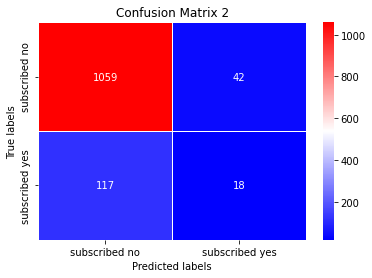

In [201]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=1)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
rdf = y_test_pred
evaluation_df.iloc[1,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]
cm = confusion_matrix(y_test, y_test_pred)
plot_confusio_matrix(cm,2)

#### balenced Random Forest <a id='7'></a> 

In [520]:
ros = RandomOverSampler()
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
X_res, y_res = ros.fit_resample(X_train_sc, y_train)
clf = RandomForestClassifier()
hyperparameter =[
    {"max_depth": [2,3,4,5,6,7, 8, 9,10], 
    "n_estimators": [1,5,10,15,20,25, 30, 35, 40, 45, 50]}
]
score_balanced_random_forest = cross_validate_setting(X_res,y_res,clf,hyperparameter)
print(score_balanced_random_forest.best_params_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['bal. RandomForest'], 'best hyperparameters':[score_balanced_random_forest.best_params_]}),ignore_index=True)

{'max_depth': 10, 'n_estimators': 35}


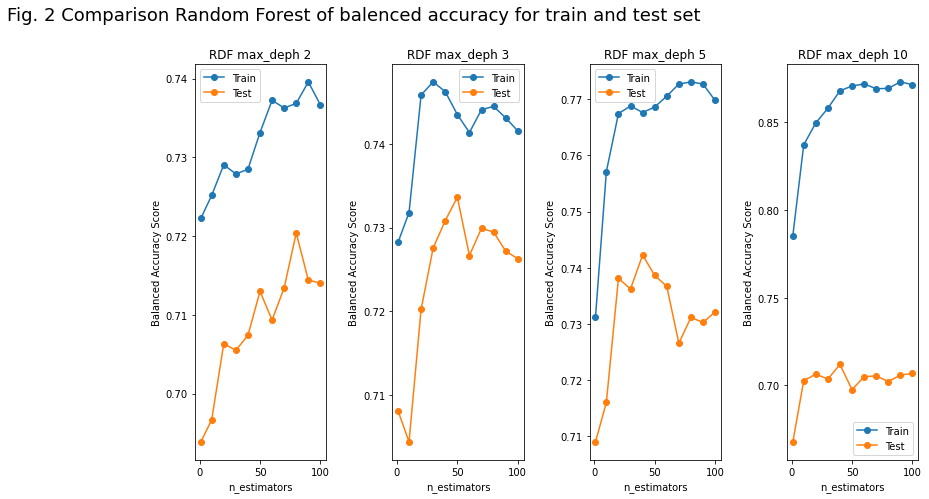

In [722]:
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,20,30,40,50,60,70,80,90,100]}
result_rf= check_overfitting("rdf",X_res, y_res,X_test_sc, y_test, hyperparameter, '', 2)

In [723]:
result_rf.sort_values(by = ["test_acc", "train_acc"], ascending = False).head(5)

,algorithm,max_deph,n_estimators,test_acc,train_acc
26,Random Forest,5,40,0.742255,0.767628
27,Random Forest,5,50,0.738621,0.768601
24,Random Forest,5,20,0.738097,0.767433
28,Random Forest,5,60,0.736664,0.770549
25,Random Forest,5,30,0.736210,0.768796


In [724]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=5,n_estimators=40)
evaluation_df.iloc[2,1] = calc_f1_score(model,X_res, y_res, X_test_sc, y_test)
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=5,n_estimators=40)
evaluation_df.iloc[2,2] = calc_balanced_accuracy_score(model,X_res, y_res, X_test_sc, y_test)

0.4790419161676647
0.742254516096478


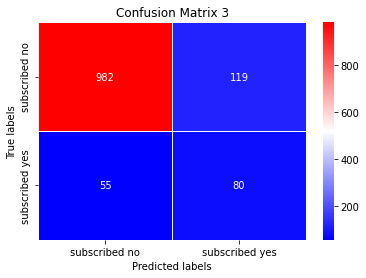

In [725]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=5,n_estimators=40)
clf.fit(X_res, y_res)
y_test_pred = clf.predict(X_test_sc)
balenced_rdf = y_test_pred
evaluation_df.iloc[2,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]
cm = confusion_matrix(y_test, y_test_pred)
plot_confusio_matrix(cm,3)

#### Support Vector Machine <a id='8'></a> 

In [33]:
clf=  SVC()
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
hyperparameter = [{'kernel': ['rbf'],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100],
                    'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}]

score_svc = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score_svc.best_params_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['balanced RandomForest'], 'best hyperparameters':[score_svc.best_params_]}),ignore_index=True)

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}


,algorithm,C,gamma,test_acc,train_acc
0,SVM Kernel: rbf,0.001,0.01000,0.614643,0.641215
1,SVM Kernel: rbf,0.001,0.00100,0.614643,0.641215
2,SVM Kernel: rbf,0.001,0.00010,0.614643,0.641215
3,SVM Kernel: rbf,0.001,0.00001,0.614643,0.641215
4,SVM Kernel: rbf,0.100,0.01000,0.514714,0.960460


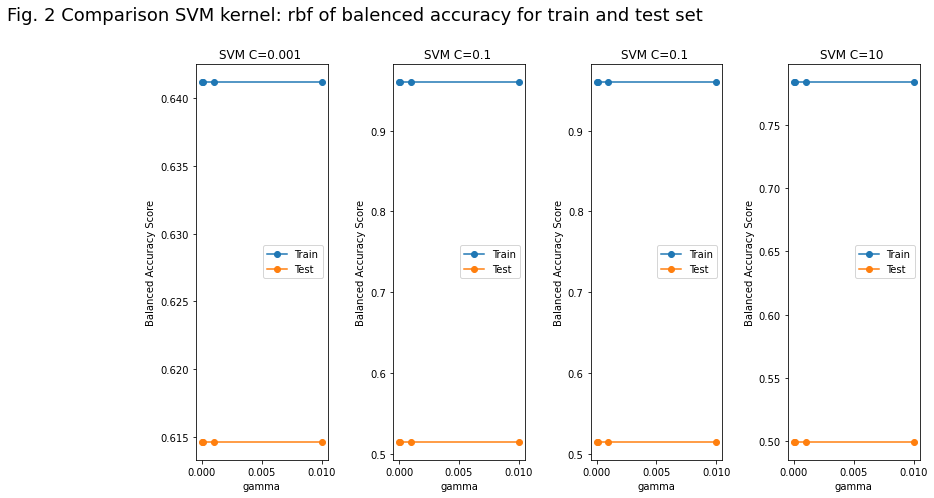

In [712]:
hyperparameter = {'C': [0.001, 0.10, 0.1, 10],
                    'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}
result_svm = check_overfitting("svm",X_res, y_res,X_test_sc, y_test, hyperparameter, "rbf", 2)
result_svm.head()

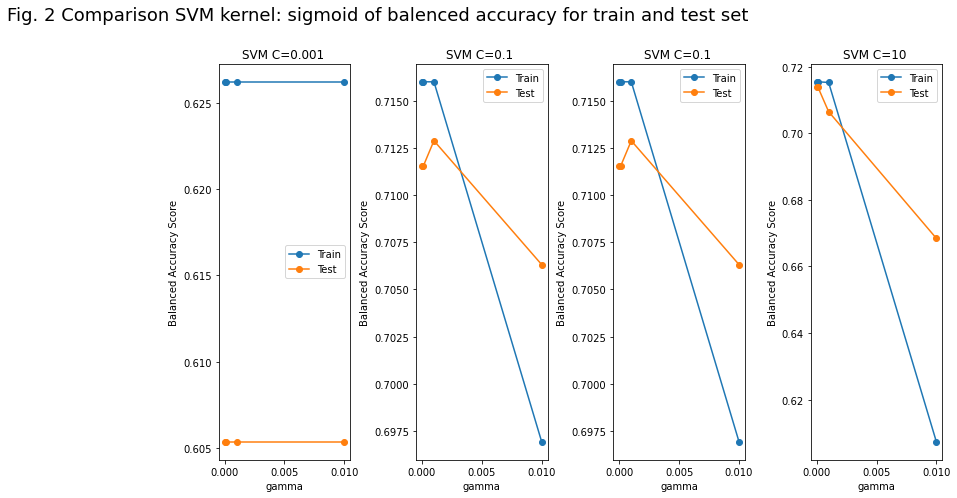

In [713]:
hyperparameter = {'C': [0.001, 0.10, 0.1, 10],
                    'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}
svm_simoid = check_overfitting("svm",X_res, y_res,X_test_sc, y_test, hyperparameter, "sigmoid",2)

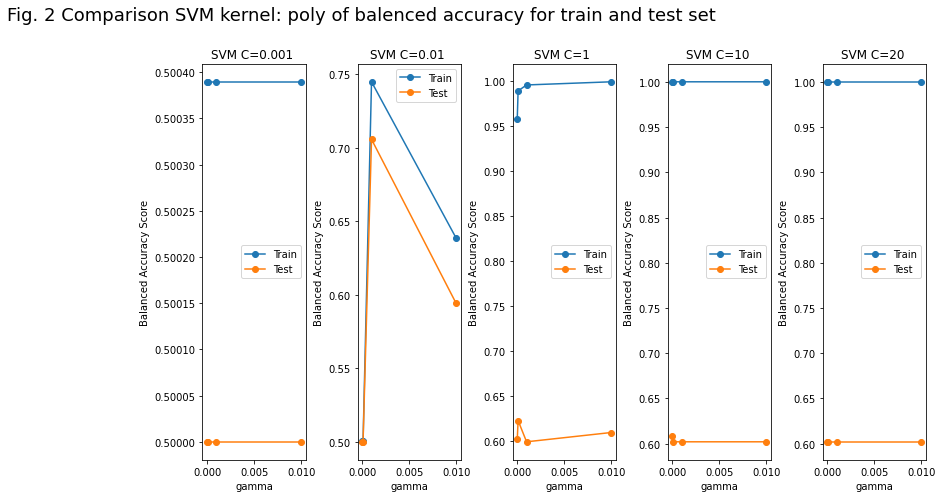

In [714]:
hyperparameter = {'C': [0.001, 0.01, 1, 10,20],
                    'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}
svm_poly = check_overfitting("svm",X_res, y_res,X_test_sc, y_test, hyperparameter, "poly", 2)

In [715]:
svm_results = pd.concat([svm_poly, svm_simoid, result_svm])
svm_results.sort_values(by = ["test_acc", "train_acc"], ascending = False).head(5)

,algorithm,C,gamma,test_acc,train_acc
14,SVM Kernel: sigmoid,10.0,0.00010,0.713866,0.715427
15,SVM Kernel: sigmoid,10.0,0.00001,0.713866,0.715427
5,SVM Kernel: sigmoid,0.1,0.00100,0.712887,0.716011
9,SVM Kernel: sigmoid,0.1,0.00100,0.712887,0.716011
6,SVM Kernel: sigmoid,0.1,0.00010,0.711525,0.716011


In [205]:
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['SVM'], 'best hyperparameters':[score_svc.best_params_]}),ignore_index=True)

In [727]:
model=  SVC(kernel = 'sigmoid', gamma = 0.01, C = 0.1)
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
evaluation_df.iloc[3,1] = calc_f1_score(model,X_res,y_res,X_test_sc,y_test)
evaluation_df.iloc[3,2] = calc_balanced_accuracy_score(model,X_res,y_res,X_test_sc,y_test)

0.3502824858757062
0.7068422646079322


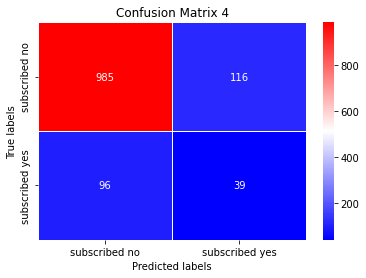

In [207]:
y_test_pred = model.predict(X_test_sc)
evaluation_df.iloc[3,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]
cm = confusion_matrix(y_test, y_test_pred)
plot_confusio_matrix(cm,4)

## SVM with resempled Data

In [188]:
ros = RandomOverSampler()
model=  SVC(kernel = 'rbf', gamma = 0.01, C = 50)
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
X_res, y_res = ros.fit_resample(X_train_sc, y_train)

In [75]:
clf=  SVC()
hyperparameter = [{'kernel': ['rbf'],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100],
                    'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}]

score_svc_res = cross_validate_setting(X_res,y_res,clf,hyperparameter)
print(score_svc_res.best_params_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['SVM Resemple'], 'best hyperparameters':[score_svc_res.best_params_]}),ignore_index=True)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [208]:
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['SVM Resemple'], 'best hyperparameters':[score_svc_res.best_params_]}),ignore_index=True)

In [209]:
model=  SVC(kernel = 'rbf', gamma = 0.01, C = 100)
calc_f1_score(model,X_res, y_res, X_test_sc, y_test)
evaluation_df.iloc[4,1] = calc_f1_score(model,X_res, y_res, X_test_sc, y_test)
calc_balanced_accuracy_score(model,X_res, y_res, X_test_sc, y_test)
evaluation_df.iloc[4,2] = calc_f1_score(model,X_res, y_res, X_test_sc, y_test)

0.2785714285714285
0.2785714285714285
0.5963063881320012
0.2785714285714285


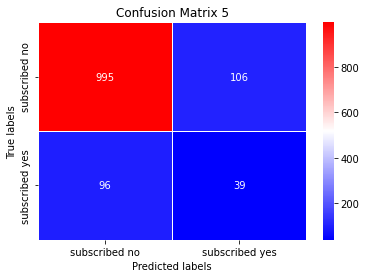

In [210]:
y_test_pred = model.predict(X_test_sc)
evaluation_df.iloc[4,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]
cm = confusion_matrix(y_test, y_test_pred)
plot_confusio_matrix(cm,5)

## K-NEAREST NEIGHBOURS 

In [224]:
clf=  KNeighborsClassifier()
hyperparameter = [{"n_neighbors": [2,3,4,5,6,7,8,9,10],
                    "metric": ['euclidean', 'manhattan'],
                    "weights": ['uniform', 'distance']}]
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
score_KNeighborsClassifier = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score_KNeighborsClassifier.best_params_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['KNeighborsClassifier'], 'best hyperparameters':[score_KNeighborsClassifier.best_params_]}),ignore_index=True)

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [246]:
model=  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", weights = "uniform")
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
evaluation_df.iloc[5,2] = calc_balanced_accuracy_score(model,X_res, y_res, X_test_sc, y_test)
evaluation_df.iloc[5,1] = calc_f1_score(model,X_res, y_res, X_test_sc, y_test)

0.6315369865778585
0.30024213075060535


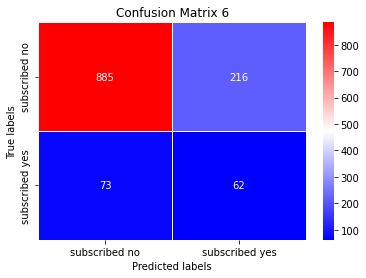

In [247]:
y_test_pred = model.predict(X_test_sc)
evaluation_df.iloc[5,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]
cm = confusion_matrix(y_test, y_test_pred)
plot_confusio_matrix(cm,6)

In [237]:
clf=  KNeighborsClassifier()
hyperparameter = [{"n_neighbors": [2,3,4,5,6,7,8,9,10],
                    "metric": ['euclidean', 'manhattan'],
                    "weights": ['uniform', 'distance']}]
X_train_sc, y_train, X_test_sc, y_test = ml_setup_dummy_encoding(df)
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train_sc, y_train)
score_KNeighborsClassifier = cross_validate_setting(X_res,y_res,clf,hyperparameter)
print(score_KNeighborsClassifier.best_params_)
#evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['KNeighborsClassifier'], 'best hyperparameters':[score_KNeighborsClassifier.best_params_]}),ignore_index=True)

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [243]:
model=  KNeighborsClassifier(n_neighbors = 2, metric = "euclidean", weights = "distance")
evaluation_df.iloc[6,1] = calc_f1_score(model,X_res, y_res, X_test_sc, y_test)
evaluation_df.iloc[6,2] = calc_balanced_accuracy_score(model,X_res, y_res, X_test_sc, y_test)

0.2891566265060241
0.5979109900090827


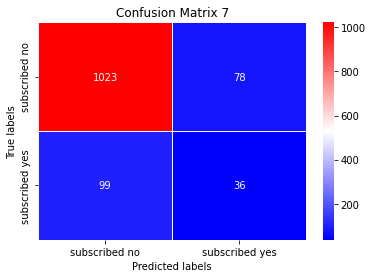

In [244]:
y_test_pred = model.predict(X_test_sc)
evaluation_df.iloc[6,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]
cm = confusion_matrix(y_test, y_test_pred)
plot_confusio_matrix(cm,7)

## Evaluation

In [248]:
evaluation_df

,algorithm,F1_score,balanced accuracy,confusion matrix,best hyperparameters
0,Decision tree,0.328767,0.581623,"[[1053, 48], [99, 36]]",{'max_depth': 12}
1,RandomForest,0.184615,0.547593,"[[1059, 42], [117, 18]]","{'max_depth': 10, 'n_estimators': 1}"
2,bal. RandomForest,0.439863,0.695257,"[[1009, 92], [71, 64]]","{'max_depth': 10, 'n_estimators': 100}"
3,SVM,0.268966,0.268966,"[[985, 116], [96, 39]]","{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}"
4,SVM Resemple,0.278571,0.278571,"[[995, 106], [96, 39]]","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
5,KNeighborsClassifier,0.300242,0.631537,"[[885, 216], [73, 62]]","{'metric': 'manhattan', 'n_neighbors': 2, 'wei..."
6,bal. KNeighborsClassifier,0.289157,0.597911,"[[1023, 78], [99, 36]]","{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."


IndexError: index 5 is out of bounds for axis 0 with size 5

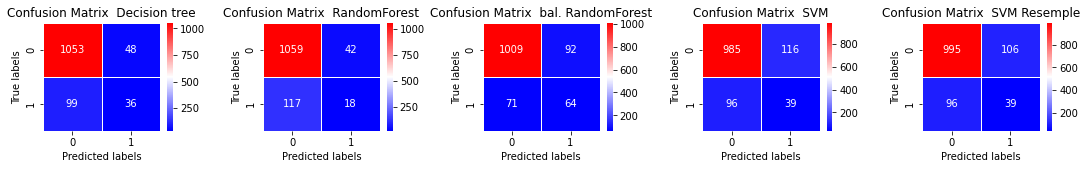

In [249]:
plot_all_confusion_matrix(evaluation_df)